In [ ]:
# Problem 6

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 2 - x**2 * np.sin(x)

# (a) 
x_points_a = np.linspace(0.5, 2, 5)
f_points_a = f(x_points_a)

# root of f(x) = 0 
target = 0

p1 = np.interp(target, f_points_a, x_points_a)

print(f"(a) First estimate p1 = {p1:.6f}")

(a) First estimate p1 = 2.000000


(b) Improved estimate p2 = 2.050000


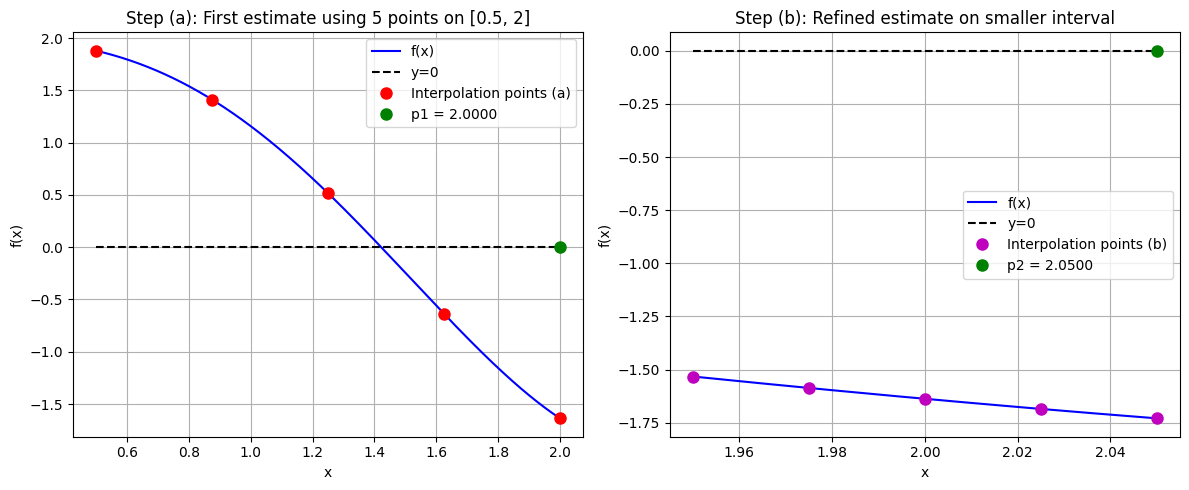


Detailed results:
Step (a):
  Interpolation points: x = [0.5   0.875 1.25  1.625 2.   ]
  f(x) values: [ 1.88014362  1.41234951  0.51721153 -0.63674682 -1.63718971]
  First estimate p1 = 2.00000000

Step (b):
  New interval: [1.9500, 2.0500]
  Interpolation points: x = [1.95  1.975 2.    2.025 2.05 ]
  f(x) values: [-1.53236932 -1.58629654 -1.63718971 -1.6848655  -1.72914035]
  Improved estimate p2 = 2.05000000


In [8]:
# (b) repeat with a new interval of length 0.1 that contains the estimate p1
left_bound = p1 - 0.05
right_bound = p1 + 0.05

x_points_b = np.linspace(left_bound, right_bound, 5)
f_points_b = f(x_points_b)

p2 = np.interp(target, f_points_b, x_points_b)

print(f"(b) Improved estimate p2 = {p2:.6f}")

plt.figure(figsize=(12, 5))

x_plot = np.linspace(0.5, 2, 1000)
plt.subplot(1, 2, 1)
plt.plot(x_plot, f(x_plot), 'b-', label='f(x)')
plt.plot(x_plot, np.zeros_like(x_plot), 'k--', label='y=0')
plt.plot(x_points_a, f_points_a, 'ro', markersize=8, label='Interpolation points (a)')
plt.plot(p1, 0, 'go', markersize=8, label=f'p1 = {p1:.4f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Step (a): First estimate using 5 points on [0.5, 2]')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
x_plot_b = np.linspace(left_bound, right_bound, 200)
plt.plot(x_plot_b, f(x_plot_b), 'b-', label='f(x)')
plt.plot(x_plot_b, np.zeros_like(x_plot_b), 'k--', label='y=0')
plt.plot(x_points_b, f_points_b, 'mo', markersize=8, label='Interpolation points (b)')
plt.plot(p2, 0, 'go', markersize=8, label=f'p2 = {p2:.4f}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Step (b): Refined estimate on smaller interval')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"\nDetailed results:")
print(f"Step (a):")
print(f"  Interpolation points: x = {x_points_a}")
print(f"  f(x) values: {f_points_a}")
print(f"  First estimate p1 = {p1:.8f}")

print(f"\nStep (b):")
print(f"  New interval: [{left_bound:.4f}, {right_bound:.4f}]")
print(f"  Interpolation points: x = {x_points_b}")
print(f"  f(x) values: {f_points_b}")
print(f"  Improved estimate p2 = {p2:.8f}")

In [ ]:
# Problem 7

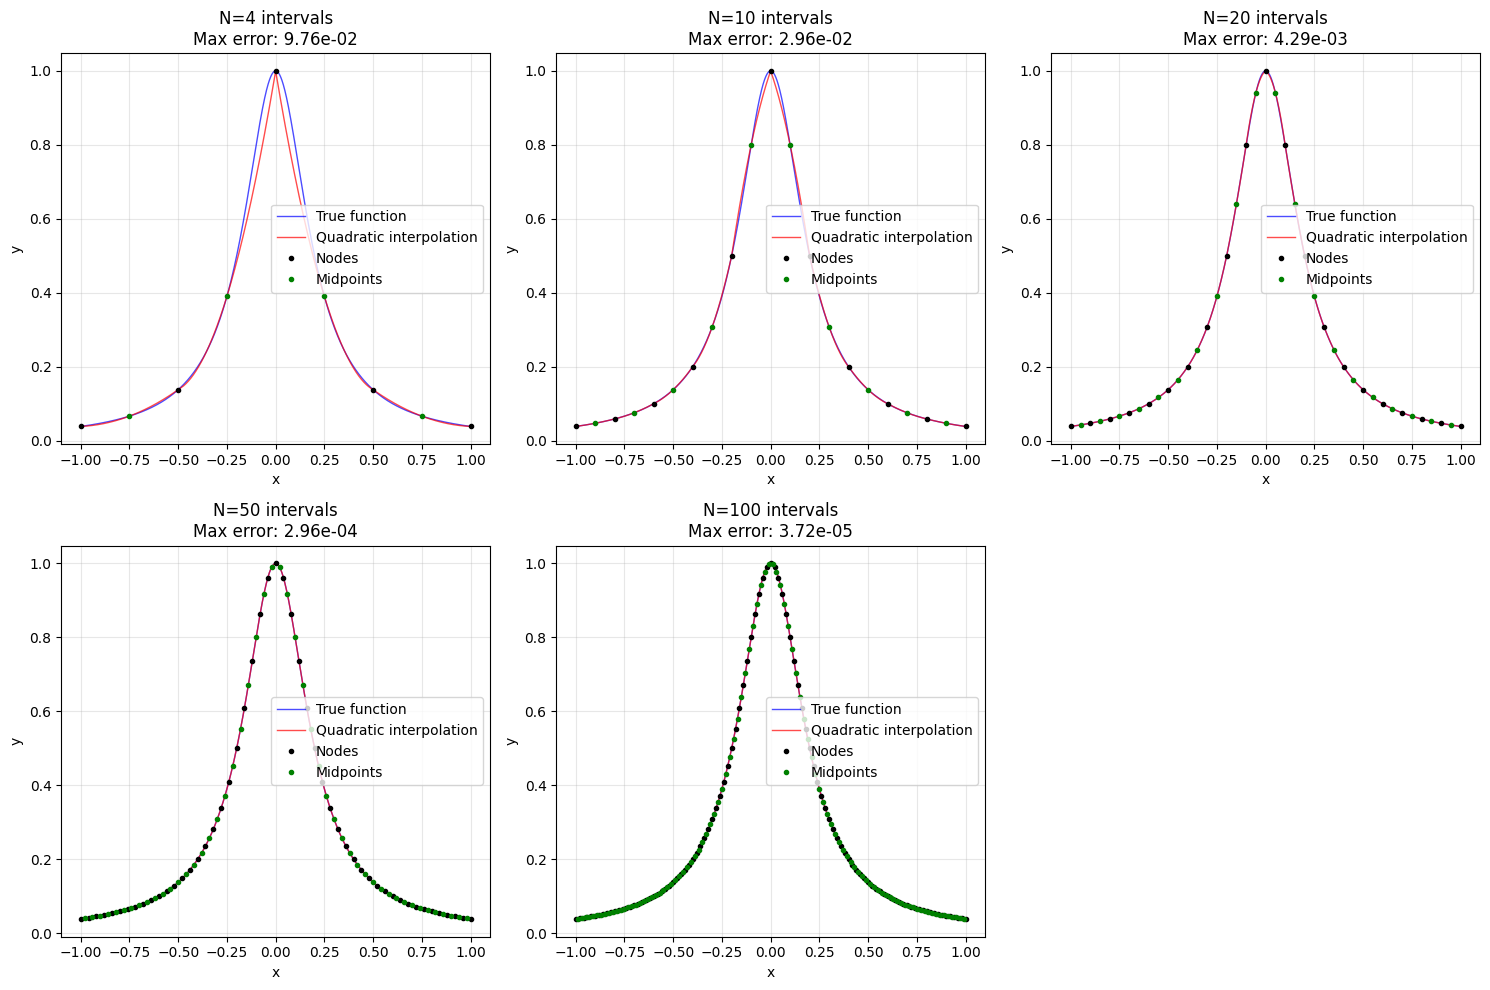

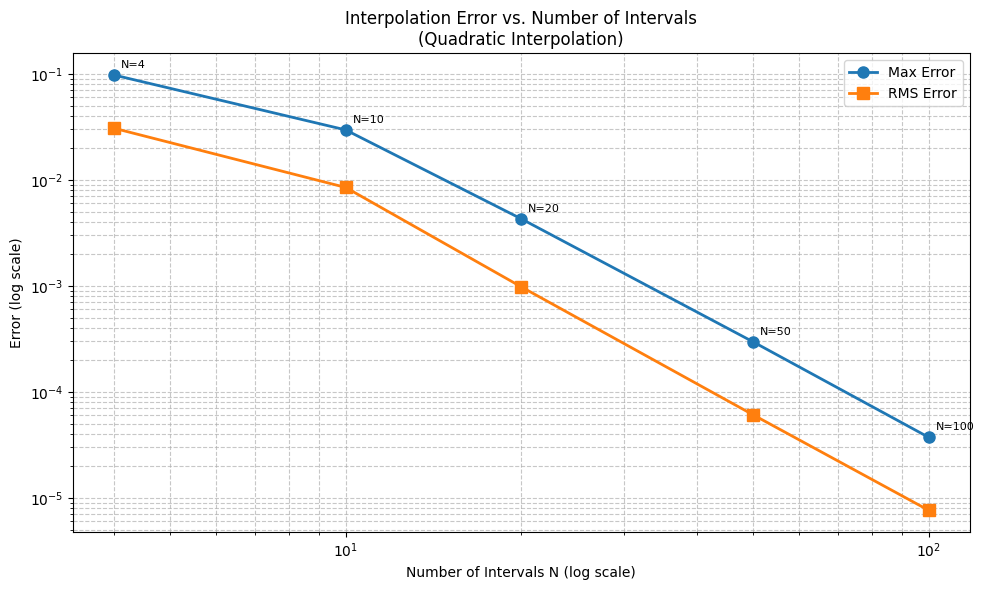

Results for Quadratic Interpolation:
N	Max Error	RMS Error
4	9.76e-02	3.07e-02
10	2.96e-02	8.48e-03
20	4.29e-03	9.80e-04
50	2.96e-04	6.07e-05
100	3.72e-05	7.63e-06


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def runge(x):
    return 1 / (1 + 25 * x**2)

def quadratic_interpolate(x, x_nodes, y_nodes):
    n_intervals = len(x_nodes) - 1
    result = np.zeros_like(x)
    
    for i in range(n_intervals):
        # 3 points in the interval: left, middle and right
        x0, x1, x2 = x_nodes[i], (x_nodes[i] + x_nodes[i+1])/2, x_nodes[i+1]
        y0, y1, y2 = y_nodes[i], runge(x1), y_nodes[i+1]

        mask = (x >= x_nodes[i]) & (x <= x_nodes[i+1])
        x_interval = x[mask]
        
        if len(x_interval) > 0:
            # p(x) = a*x² + b*x + c
            A = np.array([[x0**2, x0, 1],
                         [x1**2, x1, 1],
                         [x2**2, x2, 1]])
            coeffs = np.linalg.solve(A, np.array([y0, y1, y2]))

            result[mask] = coeffs[0] * x_interval**2 + coeffs[1] * x_interval + coeffs[2]
    
    return result

N_list = [4, 10, 20, 50, 100]
max_errors = []
rms_errors = []

plt.figure(figsize=(15, 10))

for i, N in enumerate(N_list):
    x_endpoints = np.linspace(-1, 1, N + 1)
    y_endpoints = runge(x_endpoints)

    x_eval = np.linspace(-1, 1, 10000)
    y_true = runge(x_eval)
    y_interp = quadratic_interpolate(x_eval, x_endpoints, y_endpoints)

    abs_error = np.abs(y_interp - y_true)
    max_error = np.max(abs_error)
    rms_error = np.sqrt(np.mean(abs_error**2))
    
    max_errors.append(max_error)
    rms_errors.append(rms_error)

    plt.subplot(2, 3, i+1)
    plt.plot(x_eval, y_true, 'b-', label='True function', linewidth=1, alpha=0.7)
    plt.plot(x_eval, y_interp, 'r-', label='Quadratic interpolation', linewidth=1, alpha=0.7)
    plt.plot(x_endpoints, y_endpoints, 'ko', markersize=3, label='Nodes')
    
    # marks the midpoint 
    for j in range(N):
        x_mid = (x_endpoints[j] + x_endpoints[j+1])/2
        plt.plot(x_mid, runge(x_mid), 'go', markersize=3, label='Midpoints' if j == 0 else "")
    
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'N={N} intervals\nMax error: {max_error:.2e}')
    plt.legend()
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.loglog(N_list, max_errors, 'o-', label='Max Error', linewidth=2, markersize=8)
plt.loglog(N_list, rms_errors, 's-', label='RMS Error', linewidth=2, markersize=8)
plt.xlabel('Number of Intervals N (log scale)')
plt.ylabel('Error (log scale)')
plt.title('Interpolation Error vs. Number of Intervals\n(Quadratic Interpolation)')
plt.grid(True, which='both', linestyle='--', alpha=0.7)
plt.legend()

for i, (N, error) in enumerate(zip(N_list, max_errors)):
    plt.annotate(f'N={N}', (N, error), xytext=(5, 5), textcoords='offset points', fontsize=8)

plt.tight_layout()
plt.show()

print("Results for Quadratic Interpolation:")
print("N\tMax Error\tRMS Error")
for N, max_err, rms_err in zip(N_list, max_errors, rms_errors):
    print(f"{N}\t{max_err:.2e}\t{rms_err:.2e}")